In [105]:
import ast
import matplotlib.pyplot as plt
import numpy as np

arg = "0003"
end = 33.75

file_name = f"merge_data/merge_data_{arg}.txt"


def clean_data(data):
    # Filter out invalid entries
    data = ast.literal_eval(data)

    cleaned_data = []
    for row in data:
        try:
            value = int(row[1][0].strip())
            cleaned_data.append([row[0], value])
        except ValueError:
            # Skip rows with invalid integer conversion
            continue

    adjusted_data = [[(sublist[0] - end)*(-1), sublist[1]] for sublist in cleaned_data]

    return adjusted_data


with open(file_name, "r") as f:
    data = f.read()

data = clean_data(data)

# not necessary ? maybe I do everything with data
stage_data = [sublist[0] for sublist in data]
serial_data = [sublist[1] for sublist in data]

print(stage_data)
print(serial_data)


[0.001397839364820186, 3.26113135212179, 3.7590336522548142, 4.259135346448289, 4.68011673325649, 5.179494942561657, 5.677194666925953, 6.176746512604318, 6.599174869189131, 7.096932472344491, 7.596397499836257, 8.09490752727546, 8.51669921715856, 9.016019547672666, 9.5145585145074, 10.014139299581295, 10.43569947430014, 10.934354198717003, 11.432922104947266, 11.932329253647968, 12.354063064740007, 12.853412334649644, 13.351169937805004, 13.850692844087835, 14.272195140015615, 14.77177592508951, 15.26950458884934, 15.768882798154507, 16.19064554864208, 16.689936939760653, 17.18778136110261, 17.68730426738544, 18.109645805783657, 18.60838734838712, 19.108489042580594, 19.60630452452702, 20.02803833561906, 20.526548363058257, 21.025174148079586, 21.519459023771073, 21.834146010789176, 22.02694026382528, 22.024943445533555, 22.000142383562384, 21.943565865296762, 21.697754639645503, 21.338414165321076, 20.839788380299748, 20.340496989181176, 19.84178438597325, 19.420137393067805, 18.9207

In [116]:
# find local maxima and minima
from scipy.signal import find_peaks
import numpy as np

def find_min_max_y(serial_data, stage_data):
    y_max = []
    y_min = []

    max, _ = find_peaks(stage_data)
    min, _ = find_peaks(-np.array(stage_data))

    for i in range(len(max)):
        y_max.append(serial_data[max[i]])

    for i in range(len(min)):
        y_min.append(serial_data[min[i]])

    x_min = [i for i in range (len(y_min))]
    x_max = [i for i in range (len(y_max))]
    
    return x_min, x_max, y_min, y_max

x_min, x_max, y_min, y_max = find_min_max_y(serial_data, stage_data)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


Text(0.5, 0, 'Data points')

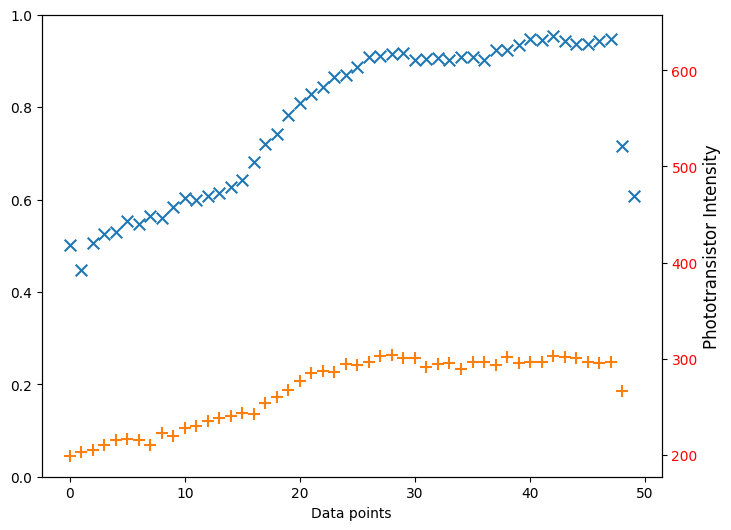

In [117]:
# Plot with stage and sensor data

x = [i for i in range (0, len(serial_data))]

fig, ax1 = plt.subplots(figsize=(8,6))

# ax1.plot([i for i in range (0, len(serial_data))], stage_data, color="blue")
# ax1.set_ylabel(r"Distance to skin $[mm]$", fontsize=12, color="blue")
# for label in ax1.get_yticklabels():
#     label.set_color("blue")

ax2 = ax1.twinx()
ax2.scatter(x_max, y_max, marker = 'x', zorder = 2, s=70)
ax2.scatter(x_min, y_min, marker = '+', zorder = 2, s=70)
#ax2.plot(x, serial_data, color="lightgrey", zorder =1)

ax2.set_ylabel("Phototransistor Intensity", fontsize=12)
for label in ax2.get_yticklabels():
    label.set_color("red")
    
ax1.set_xlabel(r"Data points")


In [121]:
# Read-in difference tape/no tape
freq= 200             # 200ms -> 5Hz

arg_nt_w = "0003"
arg_nt_lb = "0005"
arg_nt_db = "0004"
arg_t_w = "0009"
arg_t_lb = "0010"
arg_t_db = "0011"

file_name_nt_w = f"merge_data/merge_data_{arg_nt_w}.txt"
file_name_nt_lb = f"merge_data/merge_data_{arg_nt_lb}.txt"
file_name_nt_db = f"merge_data/merge_data_{arg_nt_db}.txt"
file_name_t_w = f"merge_data/merge_data_{arg_t_w}.txt"
file_name_t_lb = f"merge_data/merge_data_{arg_t_lb}.txt"
file_name_t_db = f"merge_data/merge_data_{arg_t_db}.txt"

# Open the data 
with open(file_name_nt_w, "r") as f:
    data_nt_w = f.read()

with open(file_name_nt_lb, "r") as f:
    data_nt_lb = f.read()

with open(file_name_nt_db, "r") as f:
    data_nt_db = f.read()

with open(file_name_t_w, "r") as f:
    data_t_w = f.read()

with open(file_name_t_lb, "r") as f:
    data_t_lb = f.read()

with open(file_name_t_db, "r") as f:
    data_t_db = f.read()

# Remove empty points ('')
data_nt_w = clean_data(data_nt_w)
data_nt_lb = clean_data(data_nt_lb)
data_nt_db = clean_data(data_nt_db)
data_t_w = clean_data(data_t_w)
data_t_lb = clean_data(data_t_lb)
data_t_db = clean_data(data_t_db)

# Extract stage and serial data
stage_data_nt_w = [sublist[0] for sublist in data_nt_w]
stage_data_nt_lb = [sublist[0] for sublist in data_nt_lb]
stage_data_nt_db = [sublist[0] for sublist in data_nt_db]
stage_data_t_w = [sublist[0] for sublist in data_t_w]
stage_data_t_lb = [sublist[0] for sublist in data_t_lb]
stage_data_t_db = [sublist[0] for sublist in data_t_db]

serial_data_nt_w = [sublist[1] for sublist in data_nt_w]
serial_data_nt_lb = [sublist[1] for sublist in data_nt_lb]
serial_data_nt_db = [sublist[1] for sublist in data_nt_db]
serial_data_t_w = [sublist[1] for sublist in data_t_w]
serial_data_t_lb = [sublist[1] for sublist in data_t_lb]
serial_data_t_db = [sublist[1] for sublist in data_t_db]




# Find min/max and the y-values
x_min_nt_w, x_max_nt_w, y_min_nt_w, y_max_nt_w = find_min_max_y(serial_data_nt_w, stage_data_nt_w)
x_min_nt_lb, x_max_nt_lb, y_min_nt_lb, y_max_nt_lb = find_min_max_y(serial_data_nt_lb, stage_data_nt_lb)
x_min_nt_db, x_max_nt_db, y_min_nt_db, y_max_nt_db = find_min_max_y(serial_data_nt_db, stage_data_nt_db)
x_min_t_w, x_max_t_w, y_min_t_w, y_max_t_w = find_min_max_y(serial_data_t_w, stage_data_t_w)
x_min_t_lb, x_max_t_lb, y_min_t_lb, y_max_t_lb = find_min_max_y(serial_data_t_lb, stage_data_t_lb)
x_min_t_db, x_max_t_db, y_min_t_db, y_max_t_db = find_min_max_y(serial_data_t_db, stage_data_t_db)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


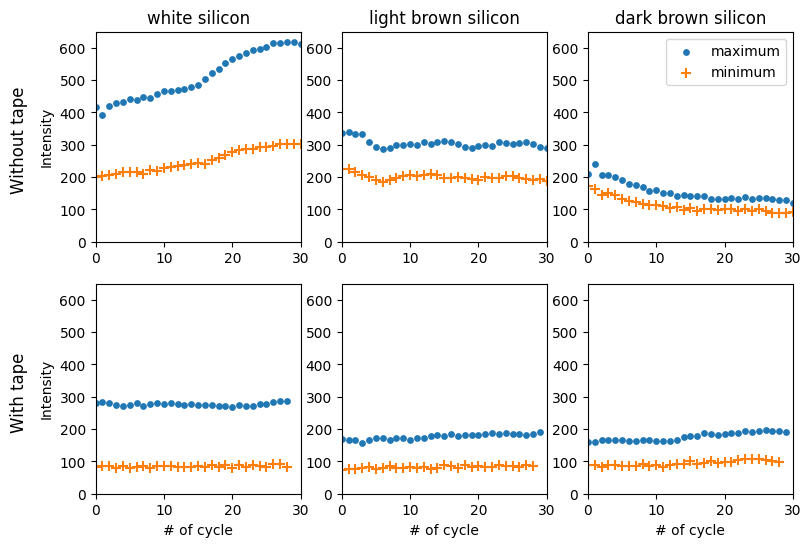

In [132]:
# Plot difference tape/no tape
plt.rcParams['font.size'] = 10

fig, ax = plt.subplots(2,3, figsize=(9,6))
size = 60

# ax[0,0].plot([i for i in range (0, len(serial_data_nt_w))], serial_data_nt_w)
ax[0,0].scatter(x_max_nt_w, y_max_nt_w, marker = '.', zorder = 2, s=size)
ax[0,0].scatter(x_min_nt_w, y_min_nt_w, marker = '+', zorder = 2, s=size)
# ax[0,1].plot([i for i in range (0, len(serial_data_nt_lb))], serial_data_nt_lb)
ax[0,1].scatter(x_max_nt_lb, y_max_nt_lb, marker = '.', zorder = 2, s=size)
ax[0,1].scatter(x_min_nt_lb, y_min_nt_lb, marker = '+', zorder = 2, s=size)
# ax[0,2].plot([i for i in range (0, len(serial_data_nt_db))], serial_data_nt_db)
ax[0,2].scatter(x_max_nt_db, y_max_nt_db, marker = '.', zorder = 2, s=size, label = "maximum")
ax[0,2].scatter(x_min_nt_db, y_min_nt_db, marker = '+', zorder = 2, s=size, label = "minimum")
# ax[1,0].plot([i for i in range (0, len(serial_data_t_w))], serial_data_t_w)
ax[1,0].scatter(x_max_t_w, y_max_t_w, marker = '.', zorder = 2, s=size)
ax[1,0].scatter(x_min_t_w, y_min_t_w, marker = '+', zorder = 2, s=size)
# ax[1,1].plot([i for i in range (0, len(serial_data_t_lb))], serial_data_t_lb)
ax[1,1].scatter(x_max_t_lb, y_max_t_lb, marker = '.', zorder = 2, s=size)
ax[1,1].scatter(x_min_t_lb, y_min_t_lb, marker = '+', zorder = 2, s=size)
# ax[1,2].plot([i for i in range (0, len(serial_data_t_db))], serial_data_t_db)
ax[1,2].scatter(x_max_t_db, y_max_t_db, marker = '.', zorder = 2, s=size)
ax[1,2].scatter(x_min_t_db, y_min_t_db, marker = '+', zorder = 2, s=size)

# set labels
ax[0,0].set(ylabel='Intensity')
ax[1,0].set(xlabel='# of cycle', ylabel='Intensity')
ax[1,1].set(xlabel='# of cycle')
ax[1,2].set(xlabel='# of cycle')

# set titles
ax[0,0].set_title('white silicon')
ax[0,1].set_title('light brown silicon')
ax[0,2].set_title('dark brown silicon')
fig.text(0.04, 0.7, 'Without tape', va='center', ha='center', rotation='vertical', fontsize=12)
fig.text(0.04, 0.28, 'With tape', va='center', ha='center', rotation='vertical', fontsize=12)

ax[0,2].legend(loc="upper right")

for axis in ax.flat:
    axis.set_ylim([0,650])   
    axis.set_xlim([0,30])